In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Aşama 1: Veri Yükleme ve Hazırlık (Pandas)




In [148]:
data = pd.read_csv('movies_initial.csv')
data.head()

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
0,1,Carmencita,1894,NOT RATED,1 min,"Documentary, Short",NaN,William K.L. Dickson,NaN,Carmencita,...,5.9,1032.0,https://m.media-amazon.com/images/M/MV5BMjAzND...,Performing on what looks like a small wooden s...,Performing on what looks like a small wooden s...,NaN,USA,NaN,2015-08-26 00:03:45.040000000,movie
1,5,Blacksmith Scene,1893,UNRATED,1 min,Short,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",...,6.2,1189.0,NaN,Three men hammer on an anvil and pass a bottle...,A stationary camera looks at a large anvil wit...,NaN,USA,1 win.,2015-08-26 00:03:50.133000000,movie
2,3,Pauvre Pierrot,1892,NaN,4 min,"Animation, Comedy, Short",1892-10-28,�mile Reynaud,NaN,NaN,...,6.7,566.0,NaN,"One night, Arlequin come to see his lover Colo...","One night, Arlequin come to see his lover Colo...",NaN,France,NaN,2015-08-12 00:06:02.720000000,movie
3,8,Edison Kinetoscopic Record of a Sneeze,1894,NaN,1 min,"Documentary, Short",1894-01-09,William K.L. Dickson,NaN,Fred Ott,...,5.9,988.0,NaN,A man (Thomas Edison's assistant) takes a pinc...,A man (Edison's assistant) takes a pinch of sn...,NaN,USA,NaN,2015-08-10 00:21:07.127000000,movie
4,10,Employees Leaving the Lumi�re Factory,1895,NaN,1 min,"Documentary, Short",1895-03-22,Louis Lumi�re,NaN,NaN,...,6.9,3469.0,NaN,A man opens the big gates to the Lumi�re facto...,A man opens the big gates to the Lumi�re facto...,NaN,France,NaN,2015-08-26 00:03:56.603000000,movie


In [149]:
data = data[["imdbID" , "title" , "director", "genre", "imdbRating" , "imdbVotes"]]

In [150]:
data.head()

,imdbID,title,director,genre,imdbRating,imdbVotes
0,1,Carmencita,William K.L. Dickson,"Documentary, Short",5.9,1032.0
1,5,Blacksmith Scene,William K.L. Dickson,Short,6.2,1189.0
2,3,Pauvre Pierrot,�mile Reynaud,"Animation, Comedy, Short",6.7,566.0
3,8,Edison Kinetoscopic Record of a Sneeze,William K.L. Dickson,"Documentary, Short",5.9,988.0
4,10,Employees Leaving the Lumi�re Factory,Louis Lumi�re,"Documentary, Short",6.9,3469.0


In [151]:
data.dtypes

,0
imdbID,int64
title,object
director,object
genre,object
imdbRating,float64
imdbVotes,float64


In [152]:
df_copy = data.copy()

for col in df_copy.columns:
    if df_copy[col].dtypes == 'object':
        df_copy[col] = df_copy[col].astype('string')
    else:
        df_copy[col] = df_copy[col].astype('float64')
data = df_copy

In [153]:
data.dtypes

,0
imdbID,float64
title,string[python]
director,string[python]
genre,string[python]
imdbRating,float64
imdbVotes,float64


In [154]:
data.head()

,imdbID,title,director,genre,imdbRating,imdbVotes
0,1.0,Carmencita,William K.L. Dickson,"Documentary, Short",5.9,1032.0
1,5.0,Blacksmith Scene,William K.L. Dickson,Short,6.2,1189.0
2,3.0,Pauvre Pierrot,�mile Reynaud,"Animation, Comedy, Short",6.7,566.0
3,8.0,Edison Kinetoscopic Record of a Sneeze,William K.L. Dickson,"Documentary, Short",5.9,988.0
4,10.0,Employees Leaving the Lumi�re Factory,Louis Lumi�re,"Documentary, Short",6.9,3469.0


In [155]:
data.isnull().sum()

,0
imdbID,0
title,0
director,605
genre,399
imdbRating,1714
imdbVotes,1715


In [156]:
import pandas as pd

df_coppy = data.copy()
for col in df_coppy.columns:
    if df_coppy[col].isnull().sum() > 0 and df_coppy[col].dtypes == 'float64':
        df_coppy[col].fillna(df_coppy[col].mean(), inplace=True)
    if df_coppy[col].isnull().sum() > 0 and df_coppy[col].dtypes == 'string':
        df_coppy[col].fillna("Unknown",inplace=True)
data = df_coppy

/tmp/ipython-input-3559840403.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_coppy[col].fillna("Unknown",inplace=True)
/tmp/ipython-input-3559840403.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [157]:
data.isnull().sum()

,0
imdbID,0
title,0
director,0
genre,0
imdbRating,0
imdbVotes,0


# Aşama 2: Keşifsel Veri Analizi (EDA) (Pandas & Numpy)

In [158]:
data.head()

,imdbID,title,director,genre,imdbRating,imdbVotes
0,1.0,Carmencita,William K.L. Dickson,"Documentary, Short",5.9,1032.0
1,5.0,Blacksmith Scene,William K.L. Dickson,Short,6.2,1189.0
2,3.0,Pauvre Pierrot,�mile Reynaud,"Animation, Comedy, Short",6.7,566.0
3,8.0,Edison Kinetoscopic Record of a Sneeze,William K.L. Dickson,"Documentary, Short",5.9,988.0
4,10.0,Employees Leaving the Lumi�re Factory,Louis Lumi�re,"Documentary, Short",6.9,3469.0


In [159]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
imdbID,46014.0,855206.215456,1.141979e+06,1.0,81657.5,252487.5,1370867.50,5023260.0
imdbRating,46014.0,6.381454,1.160869e+00,1.1,5.8,6.5,7.20,9.6
imdbVotes,46014.0,11800.552134,4.841666e+04,5.0,343.0,1088.0,4746.75,1521105.0


In [160]:
data.dtypes

,0
imdbID,float64
title,string[python]
director,string[python]
genre,string[python]
imdbRating,float64
imdbVotes,float64


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 0 to 46013
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdbID      46014 non-null  float64
 1   title       46014 non-null  string 
 2   director    46014 non-null  string 
 3   genre       46014 non-null  string 
 4   imdbRating  46014 non-null  float64
 5   imdbVotes   46014 non-null  float64
dtypes: float64(3), string(3)
memory usage: 2.1 MB


In [162]:
data.shape

(46014, 6)

# Aşama 3: Veri Görselleştirme (Matplotlib)

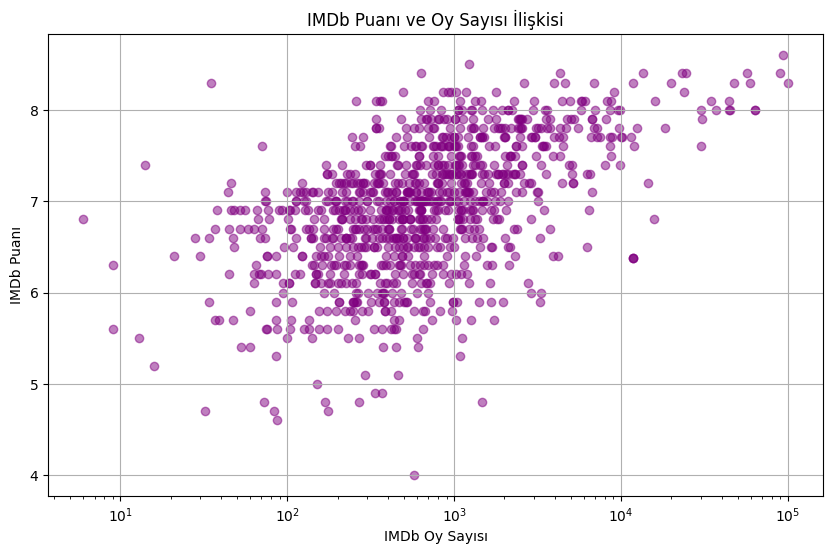

In [163]:
# hepsini aldığımda grafik karışık gözüktüğü için ilk 1000 tanesini aldım.
plt.figure(figsize=(10, 6))
plt.scatter(data['imdbVotes'][0:1000], data['imdbRating'][0:1000], alpha=0.5, color='purple')
plt.title('IMDb Puanı ve Oy Sayısı İlişkisi')
plt.xlabel('IMDb Oy Sayısı')
plt.ylabel('IMDb Puanı')
plt.grid(True)
plt.xscale('log')
plt.show()

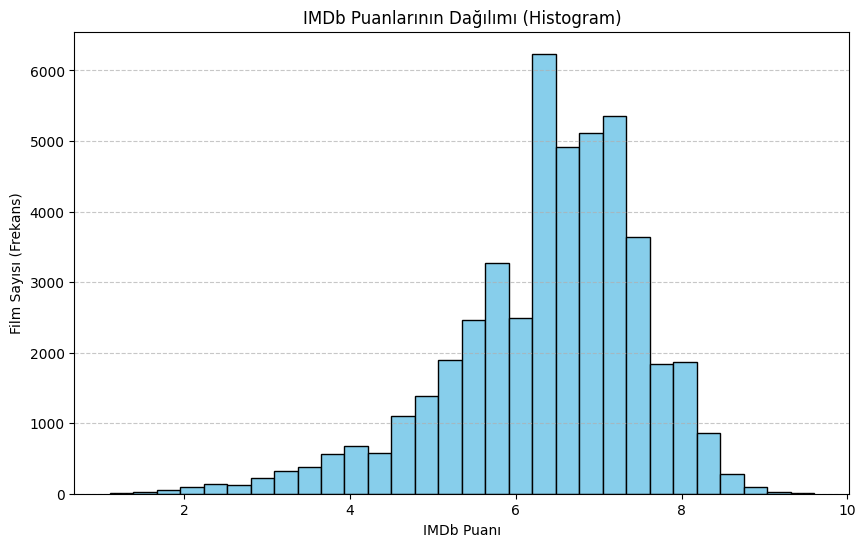

In [164]:
plt.figure(figsize=(10, 6))
plt.hist(data['imdbRating'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('IMDb Puanlarının Dağılımı (Histogram)')
plt.xlabel('IMDb Puanı')
plt.ylabel('Film Sayısı (Frekans)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()